# Preprocessing

In [32]:
import numpy as np
import librosa as lr
import matplotlib.pyplot as plt
import soundfile as sf

"""
SATEST 4
    20ms window time
    10ms hopping time
"""
sr = 16000
win_time = 0.02

# Window Sample의 길이 표현
win_len = int(win_time * sr)
hop_len = int(win_len * 0.5)
print("Window Len:",win_len)

### Read wav file
# file_path = "results/sa.wav"
# file_path = "results/wu.wav"
file_path = "SA_TEST_baseline_ver02\SA_TEST_baseline_ver02\SA_TEST01_WAV\Sa.wav"

yr,ori_sr = lr.load(file_path,sr=sr)
print(f"Loaded: {file_path}, Shape: {np.array(yr).shape}, Original sr: {ori_sr}")

Window Len: 320
Loaded: SA_TEST_baseline_ver02\SA_TEST_baseline_ver02\SA_TEST01_WAV\Sa.wav, Shape: (32000,), Original sr: 16000


## 1-1. Waveform Preprocess (optional)

Loaded: SA_TEST_baseline_ver02\SA_TEST_baseline_ver02\SA_TEST01_WAV\Sa.wav, Shape: (32000,), Original sr: 16000


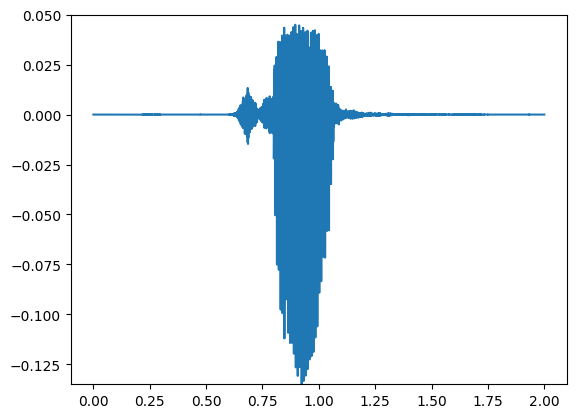

8500


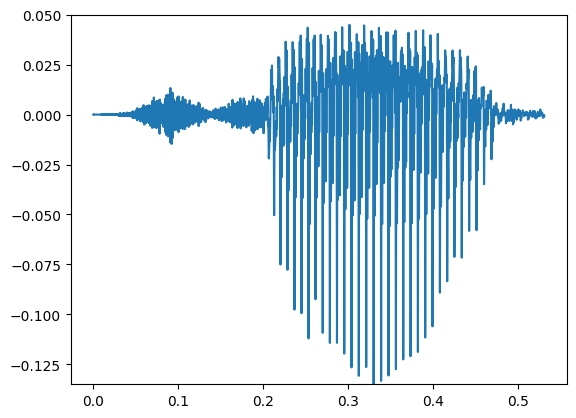

In [33]:
### Read Audio Files
yr1,ori_sr = lr.load(file_path,sr=sr)
print(f"Loaded: {file_path}, Shape: {np.array(yr1).shape}, Original sr: {ori_sr}")

### Plot Waveform
plt.plot(np.linspace(0,len(yr1),len(yr1),endpoint=False)/sr, yr1)
plt.ylim(bottom=-0.135, top=0.05)
plt.show()

### Clip waveform
if file_path == "results/sa.wav":
    yr = yr1[:15000]

elif file_path == "results/wu.wav":
    yr = yr1[3000:25000]

elif file_path == "SA_TEST_baseline_ver02\SA_TEST_baseline_ver02\SA_TEST01_WAV\Sa.wav":
    yr = yr1[9500:18000]


# Time axis
time = np.linspace(0,len(yr),len(yr),endpoint=False)/sr
plt.plot(time,yr)
plt.ylim(bottom=-0.135, top=0.05)

print(len(time))

## 1-2. LPF

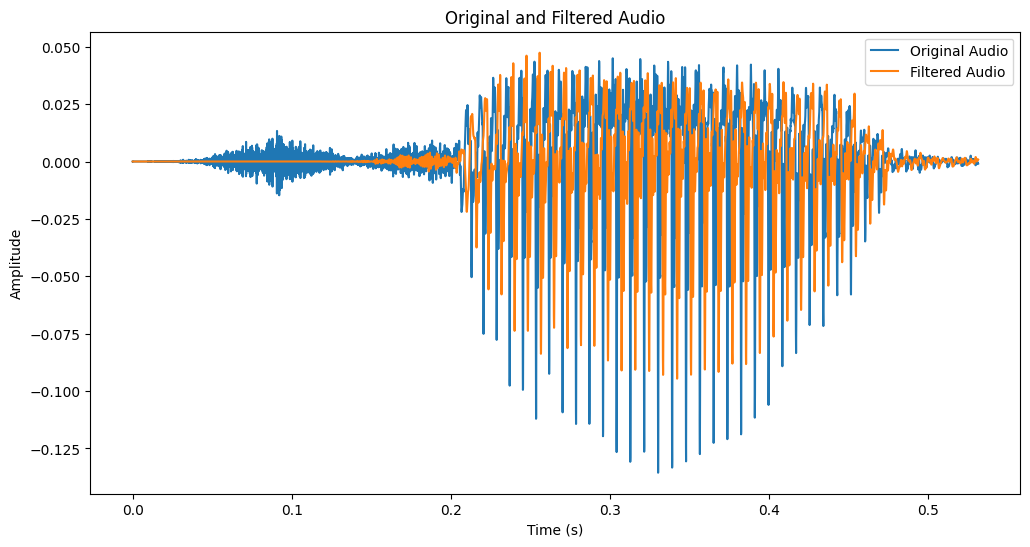

In [34]:
## Low Pass Filtering
## 900 Hz Filtering

import scipy.signal
from scipy.io.wavfile import read, write

# 음성 파일 로드

# FIR 필터 파라미터 설정
cutoff_freq = 900.0  # Hz
nyquist = 0.5 * sr
normalized_cutoff = cutoff_freq / nyquist
num_taps = 101  # 필터 길이 (홀수로 지정)

# FIR 필터 계수 생성
lpf_coeffs = scipy.signal.firwin(num_taps, normalized_cutoff, window='hamming')

# FIR 필터 적용
yr_lpf = scipy.signal.lfilter(lpf_coeffs, 1.0, yr)

# 결과를 그래프로 표시 (선택 사항)
plt.figure(figsize=(12, 6))
t1 = np.linspace(0,len(yr),len(yr),endpoint=False)/sr
t2 = np.linspace(0,len(yr_lpf),len(yr_lpf),endpoint=False)/sr
plt.plot(t1,yr, label='Original Audio')
plt.plot(t2,yr_lpf, label='Filtered Audio')
plt.title('Original and Filtered Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

## 1-3. Clipping & FindPeaks Util Functions

### CL Definition

In [35]:
## CL Clipping - Center clipping
class ThresholdClipper:
    def __init__(self, function):
        self.function = function
        self.CL = self.calculate_thres()
        self.CL = self.calculate_thres_max()
        
        
    def calculate_thres_max(self):
        function = np.abs(self.function)
        CL = 0.4 * np.max(function)
        return CL
        
    def calculate_thres(self):
        function = np.abs(self.function)
        first_max = np.max(function[0:len(function)//3]) 
        last_max = np.max(function[len(function)//3 * 2:])
        CL = 0.68 * min(first_max,last_max)
        return CL
        
    def center_clip(self,CL):
        function = self.function
        y = np.zeros_like(function)
        for n in range(0,len(y)):
            val = function[n]
            if val >= CL:
                y[n] = val - CL
            elif val <= (-1*CL):
                y[n] = val + CL
            else:
                y[n] = 0
        return y
    
    def infinite_clip(self,CL):
        function = self.function
        y = np.zeros_like(function)
        for n in range(0,len(y)):
            val = function[n]
            if val >= CL:
                y[n] = 1
            elif val <= (-1*CL):
                y[n] = -1
            else:
                y[n] = 0
        return y        

### Local Maxima 찾기 함수

Autocorrelation Sequence: [5 2 3 4 3 2 1 0 1 2 3 4 5 4 3 2 1]
Local Maxima Indices: [ 3 12]


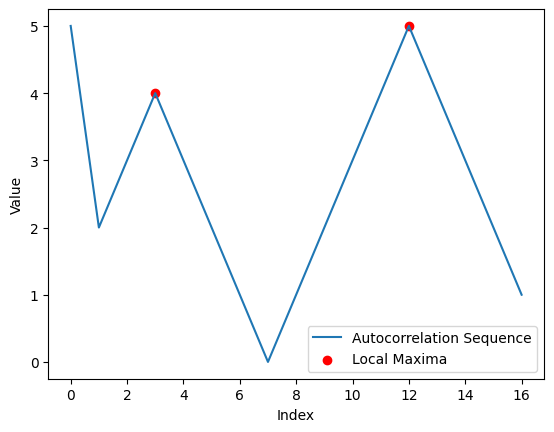

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# 예시로 autocorrelation sequence 생성
ac_sequence = np.array([5, 2, 3, 4, 3, 2, 1, 0, 1, 2, 3, 4, 5, 4, 3, 2, 1])

# local maxima 찾기
maxima_indices, _ = find_peaks(ac_sequence)

# 결과 출력
print("Autocorrelation Sequence:", ac_sequence)
print("Local Maxima Indices:", maxima_indices)

# 그래프로 표시
plt.plot(ac_sequence, label='Autocorrelation Sequence')
plt.scatter(maxima_indices, [ac_sequence[i] for i in maxima_indices], color='red', label='Local Maxima')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()


Autocorrelation Sequence: [5 2 3 4 3 2 1 0 1 2 3 4 5 4 3 2 1]
Local Maxima Indices: [ 3 12]


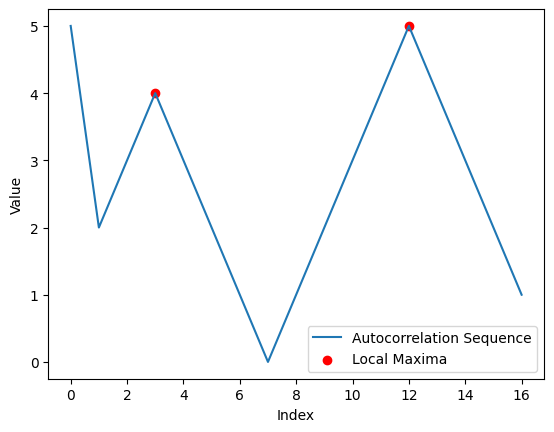

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

# 예시로 autocorrelation sequence 생성
ac_sequence = np.array([5, 2, 3, 4, 3, 2, 1, 0, 1, 2, 3, 4, 5, 4, 3, 2, 1])

# local maxima 찾기
maxima_indices = argrelextrema(ac_sequence, np.greater)[0]

# 결과 출력
print("Autocorrelation Sequence:", ac_sequence)
print("Local Maxima Indices:", maxima_indices)

# 그래프로 표시
plt.plot(ac_sequence, label='Autocorrelation Sequence')
plt.scatter(maxima_indices, [ac_sequence[i] for i in maxima_indices], color='red', label='Local Maxima')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()


# 2. Short-Time Auto Correlation

### 2-1. Main Loop

Local Maxima Indices: [ 55  77  92 111 127 148 171 188 201 221 243]


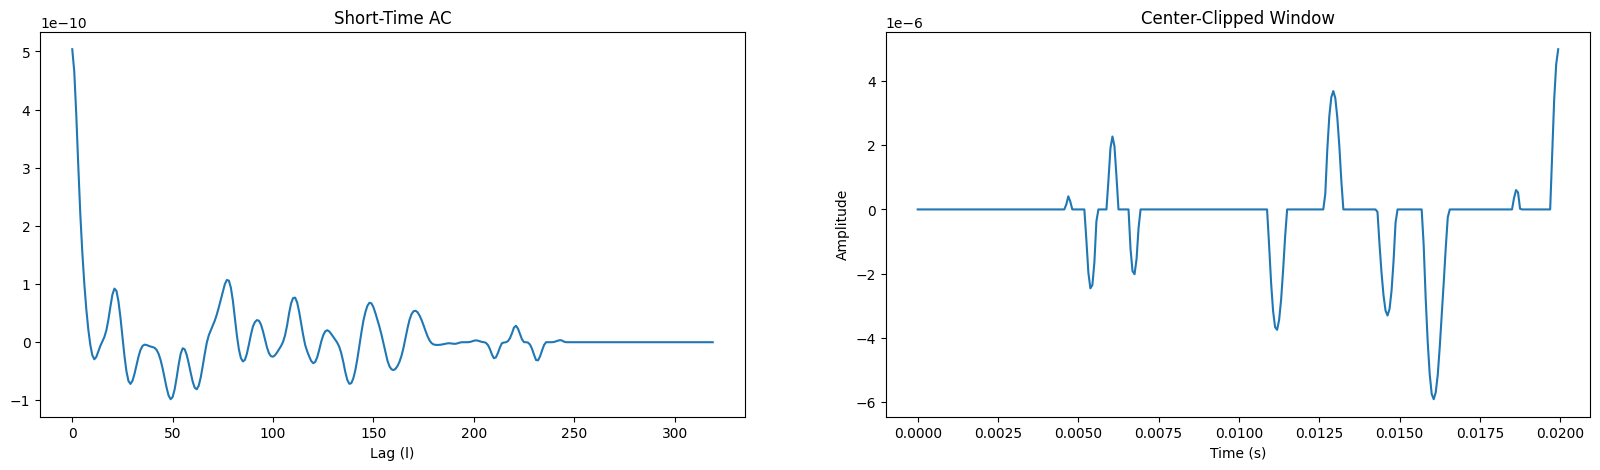

Local Maxima Indices: [ 55  78  91 111 128 148 166 187 206 220 243 298]


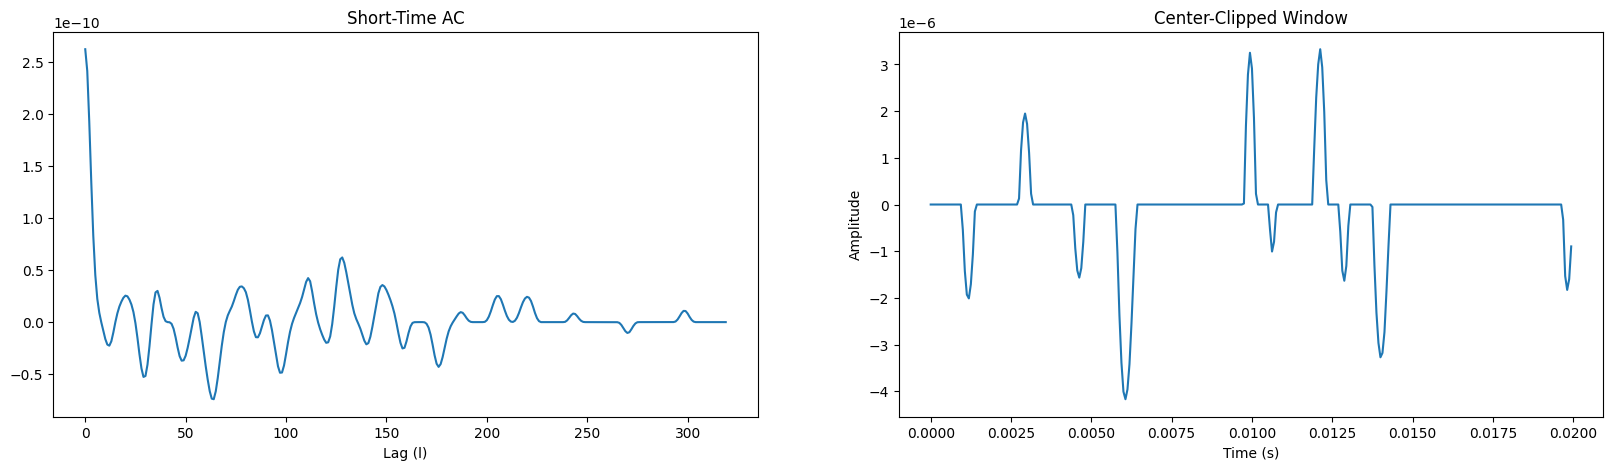

Local Maxima Indices: [ 52  67  93 114 144 162 198 215 229 249 283]


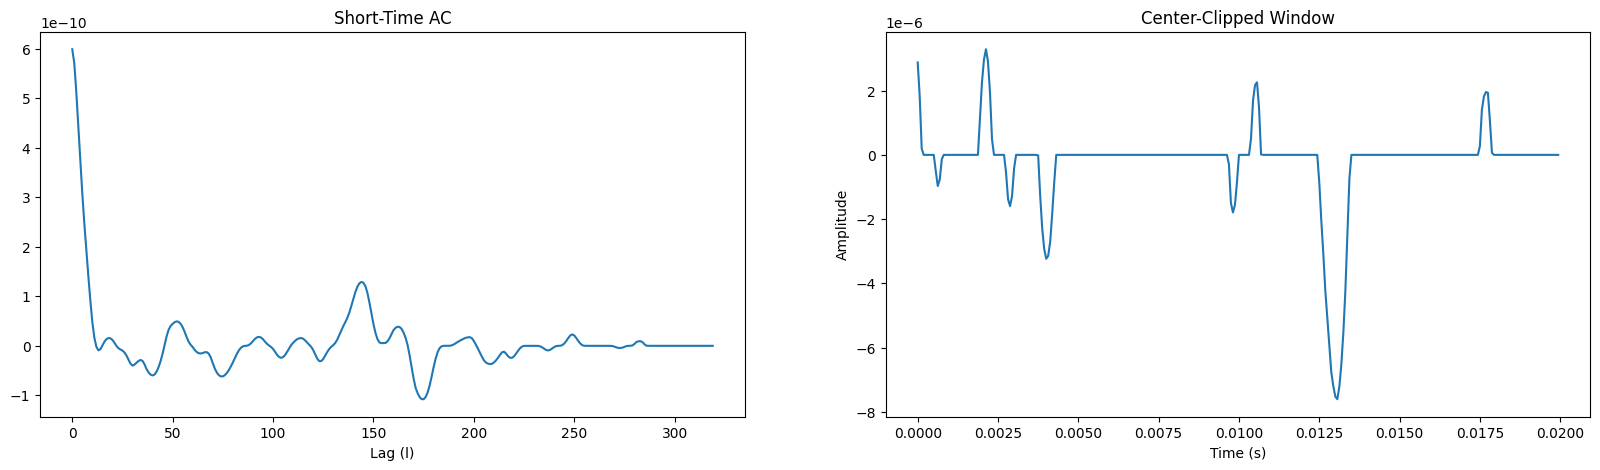

Local Maxima Indices: [ 57 115 189 304]


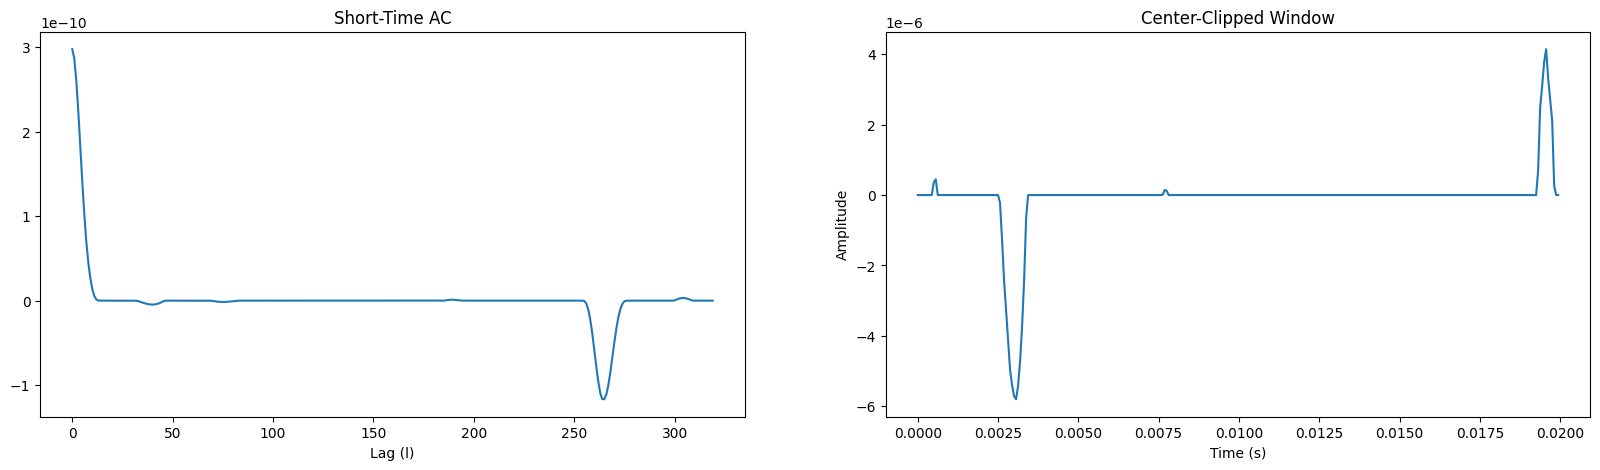

Local Maxima Indices: [ 66 106 123 141 154 174 196 202 211 231 238 240 250 259 278 289]


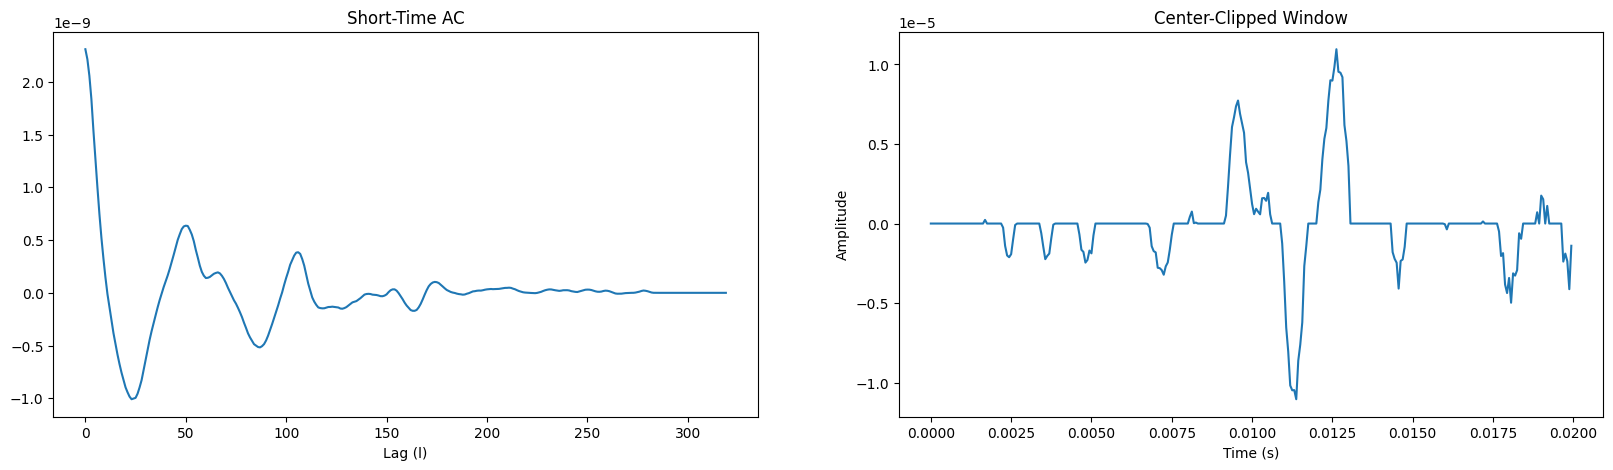

In [47]:
## Window at Frame 1
## First Window

# window center : n
n = win_len
x = yr_lpf
w = np.zeros_like(x)    
# w[0:win_len] = rect_window

pitch_period_tuple = []

cnt = 0
for n in range(win_len,len(x)+1,hop_len):
    ## In the Window
    
    ## Computation of CL

    # 320 길이를 갖는 region 생성
    # n-win_len+1 ~ n
    # n-319 ~ n
    x_n = x[n-win_len+1:n+1]
    
    Clipper = ThresholdClipper(x_n)
    CL = Clipper.calculate_thres()
    # CL_max = Clipper.calculate_thres_max()
    # print(CL,CL_max)
    yr_center = Clipper.center_clip(CL)
    yr_infin = Clipper.infinite_clip(CL)
    
    """
    ## Plotting CL Function
    plt.figure()
    plt.plot(x_n)
    CL_p= np.ones_like(x_n) * CL
    CL_n= -CL_p
    plt.plot(CL_p,label="+CL")
    plt.plot(CL_n,label="-CL")
    plt.legend()
    plt.ylim(bottom=np.min(x_n),top=np.max(x_n))
    plt.figure()
    plt.ylim(bottom=np.min(x_n),top=np.max(x_n))
    plt.plot(yr_center)
    plt.figure()
    plt.plot(yr_infin)
    plt.show()
    break
    """

    # x_n 을 shifting 하며 AC 계산하기
    ac_arr = np.zeros(win_len)
    x_n = yr_center
    for k in range(0,win_len):
        tempsum = 0
        for m in range(0, len(x_n)):    
            if m-k >= 0:
                tempsum += x_n[m] * x_n[m-k]
        ac_arr[k] = tempsum
        
        # Energy at 0-delay as "voiced" threshold
        if k == 0:
            energy = tempsum
            voice_thres = energy * 0.40
            
            
    ## Find Maximum value of AC Peak
    peakval = np.max(ac_arr)
    
    
    flag = 1 if peakval > voice_thres else 0
    
    # local maxima 찾기
    # maxima_indices = find_local_maxima(ac_arr)
    # maxima_indices = argrelextrema(ac_arr, np.greater)[0]
    maxima_indices, _ = find_peaks(ac_arr)
    maxima_indices = maxima_indices[maxima_indices>50]

    # 결과 출력

    # 그래프로 표시

    
    if maxima_indices.size > 0:
        maxval = np.max([ac_arr[i] for i in maxima_indices])
        idx = np.argmax([ac_arr[i] for i in maxima_indices])
        max_idx = maxima_indices[idx]
        

    else:
        maxval = 0

    flag = 1 if maxval > voice_thres else 0 

    if flag:
        pitch_period_tuple.append((n,max_idx))

        
    # print(voice_thres,maxval,flag)
    # plt.figure()
    # plt.plot(ac_arr)
    
    ## Optional Plot 
    plotnum=5
    if cnt < plotnum:
        plt.figure(figsize=(20,5))
        plt.subplot(1,2,1)
        plt.title("Short-Time AC")
        plt.plot(ac_arr, label='Autocorrelation Sequence')
        plt.xlabel("Lag (l)")
        print("Local Maxima Indices:", maxima_indices)

        if flag:
            print("Maximum Lag : ",max_idx)
            plt.scatter(max_idx, ac_arr[max_idx], color='red', label='Local Maxima')
        plt.subplot(1,2,2)
        plt.title("Center-Clipped Window")
        t1 = np.linspace(0,len(x_n),len(x_n),endpoint=False)/sr
        plt.plot(t1,x_n)
        # plt.ylim(bottom=-0.1, top=0.1)
        plt.ylabel("Amplitude")
        plt.xlabel("Time (s)")
        plt.show()
        cnt +=1


### 2-2. Pitch Contour

8000
8500
(55, 62, 131, 133, 132, 131, 135, 134, 136, 136, 138, 139, 140, 141, 139, 139, 138, 138, 138, 138, 138, 137, 136, 140, 138, 139, 137)


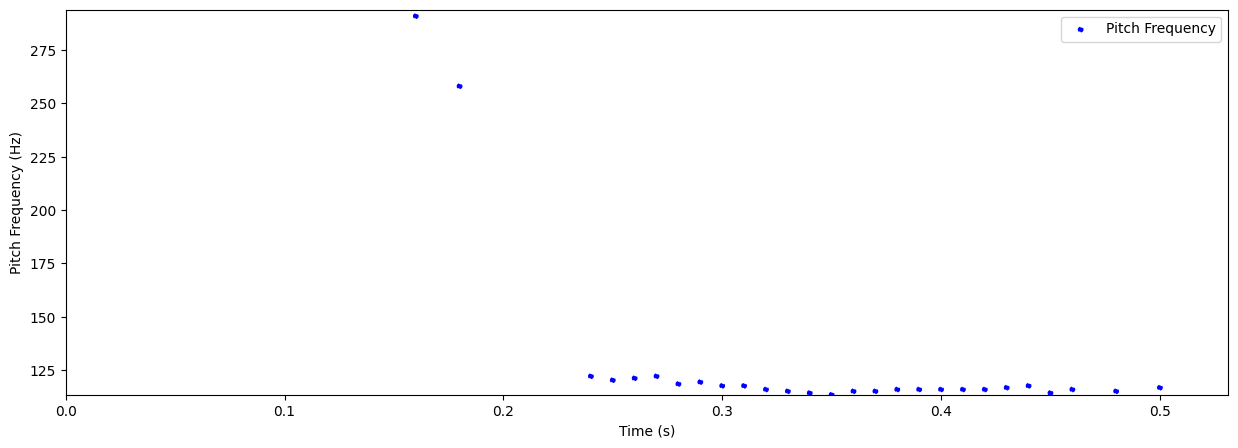

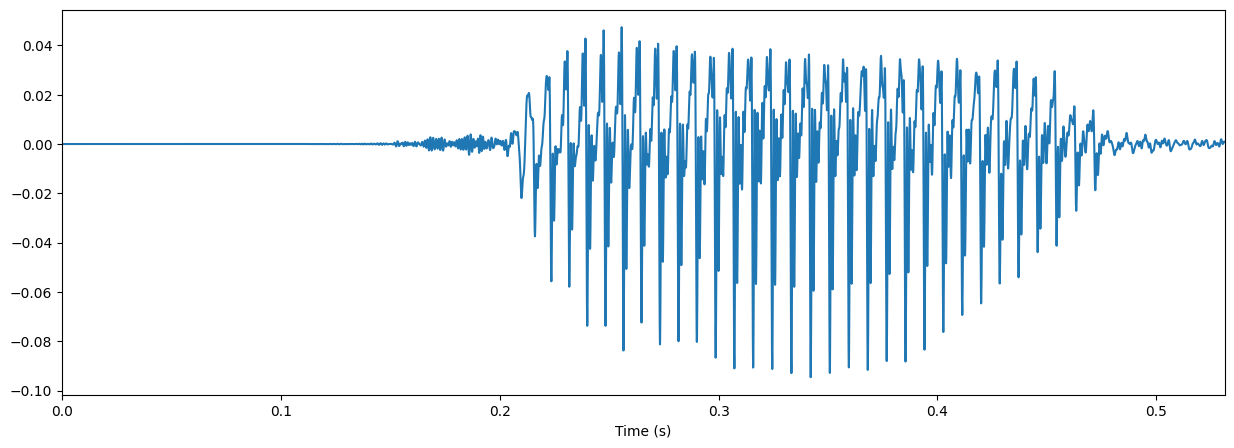

116.78832116788321


In [39]:
## Pitch Contour Plot
n_values, max_idx_values = zip(*pitch_period_tuple)
print(n_values[-1])
print(len(time))
n_values = np.array(n_values) / sr

print(max_idx_values)

plt.figure(figsize=(15,5))
pitch_frequencies = sr / np.array(max_idx_values)
plt.scatter(n_values, pitch_frequencies, label='Pitch Frequency', linestyle='dashed', color='blue',s=10)
plt.xlim(left=time[0], right=time[-1])

plt.xlabel('Time (s)')
plt.ylabel('Pitch Frequency (Hz)')
plt.ylim(bottom=np.min(pitch_frequencies),top=np.max(pitch_frequencies)+3)
plt.legend()

plt.figure(figsize=(15,5))
plt.plot(time, yr_lpf)
plt.xlim(left=time[0], right=time[-1])
plt.xlabel('Time (s)')
plt.show()

print(pitch_frequencies[-1])

### 2-3. Median Filtering

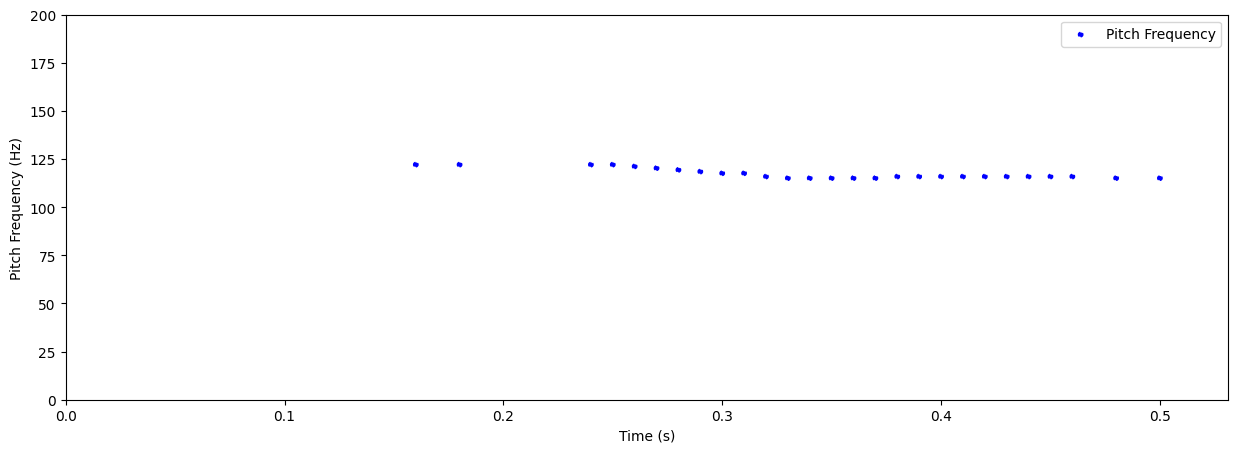

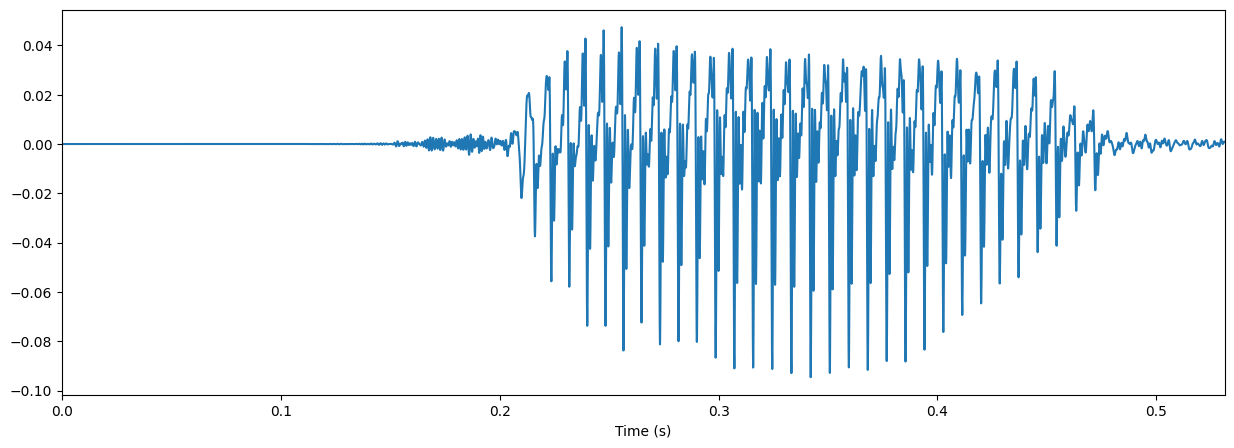

115.10791366906474


In [40]:
from scipy.signal import medfilt
pitch_freq_filterd = medfilt(pitch_frequencies, kernel_size=5)

plt.figure(figsize=(15,5))
# plt.scatter(n_values, pitch_frequencies, label='Pitch Frequency', linestyle='dashed', color='red',s=3)
plt.scatter(n_values, pitch_freq_filterd, label='Pitch Frequency', linestyle='dashed', color='blue',s=10)

# plt.xlim(left=n_values[0], right=n_values[-1])

plt.xlabel('Time (s)')
plt.ylabel('Pitch Frequency (Hz)')
plt.xlim(left=time[0], right=time[-1])
# plt.ylim(bottom=np.min(pitch_frequencies),top=np.max(pitch_frequencies)+3)
plt.ylim(bottom=0,top=200)

# plt.ylim(bottom=120, top=150)
plt.legend()

plt.figure(figsize=(15,5))
plt.plot(time, yr_lpf)
plt.xlabel('Time (s)')

# plt.xlim(left=n_values[0], right=n_values[-1])
plt.xlim(left=time[0], right=time[-1])

plt.show()

print(pitch_freq_filterd[-1])



In [41]:
# ## Real Auto Correlation
# for x in [yr, yr_center, yr_infin]:
    
#     # AC   
#     ac_arr = np.zeros_like(x)
#     for k in range(0,len(x)):
#     # for k in range(0,len(x)-win_len+1,hop_len):
#         sum=0
#         for m in range(0,len(x)):
#             sum += x[m]*x[m-k]
#         ac_arr[k] = sum


#     ## Plot
#     fig, axs = plt.subplots(2,1, figsize = (20,5))
#     axs = axs.flatten()
#     axs[0].plot(time, x)
#     axs[1].plot(time,ac_arr)


#     title_list = ["Time Plot","AC"]
#     for i,ax in enumerate(axs):
#         ax.set(xlabel="Time(s)", ylabel="Amplitude")
#         ax.set_title(title_list[i])

# plt.show()    

# AMDF Function

LPF -> Center-Clipping -> AMDF -> Argmin -> Pitch
-> 5-point Median Filter

## AMDF Function

320
320


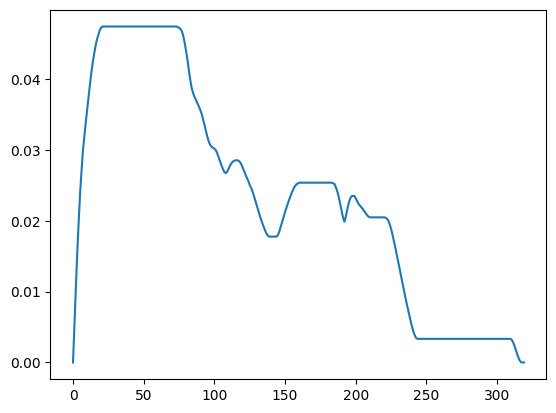

In [42]:
## AMDF
def AMDF(sig):
    amdf = []
    for lag in range(len(sig)):
        tmp = 0
        for n in range(len(sig)-lag):
            tmp += abs(sig[0+n]-sig[lag+n])
            
        amdf.append(tmp)
        
    return amdf

c=AMDF(yr_center)
print(yr_center.size)
print(len(c))
plt.plot(c)

Local Maxima Indices: [ 61  96 107 142 192]
Maximum Lag :  148


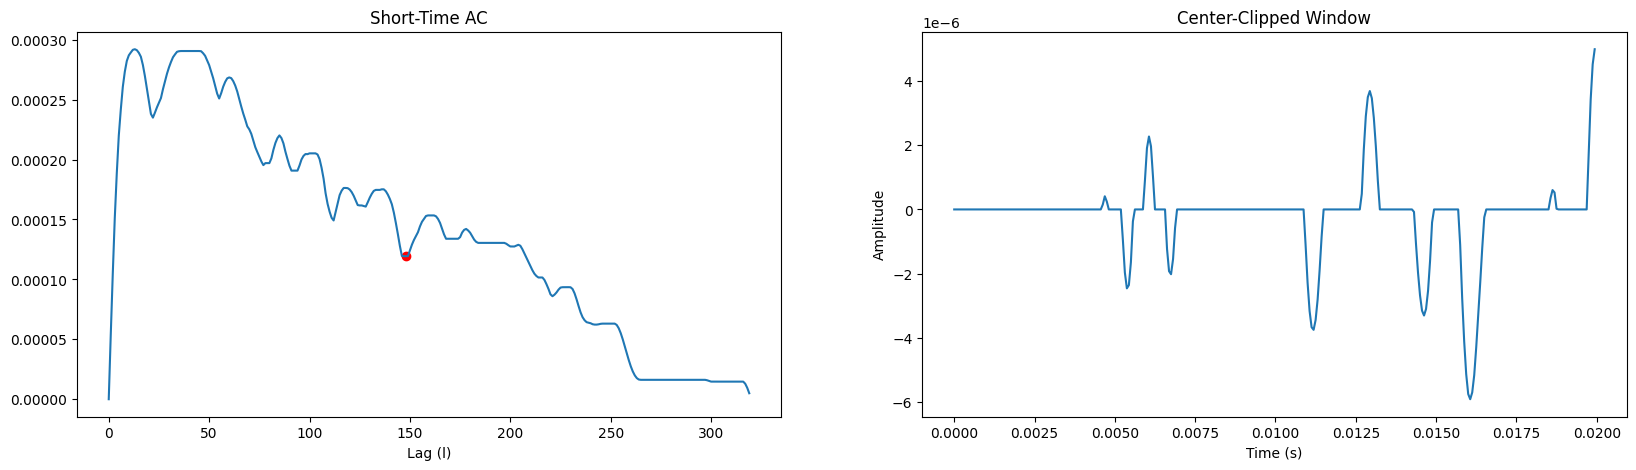

Local Maxima Indices: [ 61  96 107 142 192]
Maximum Lag :  187


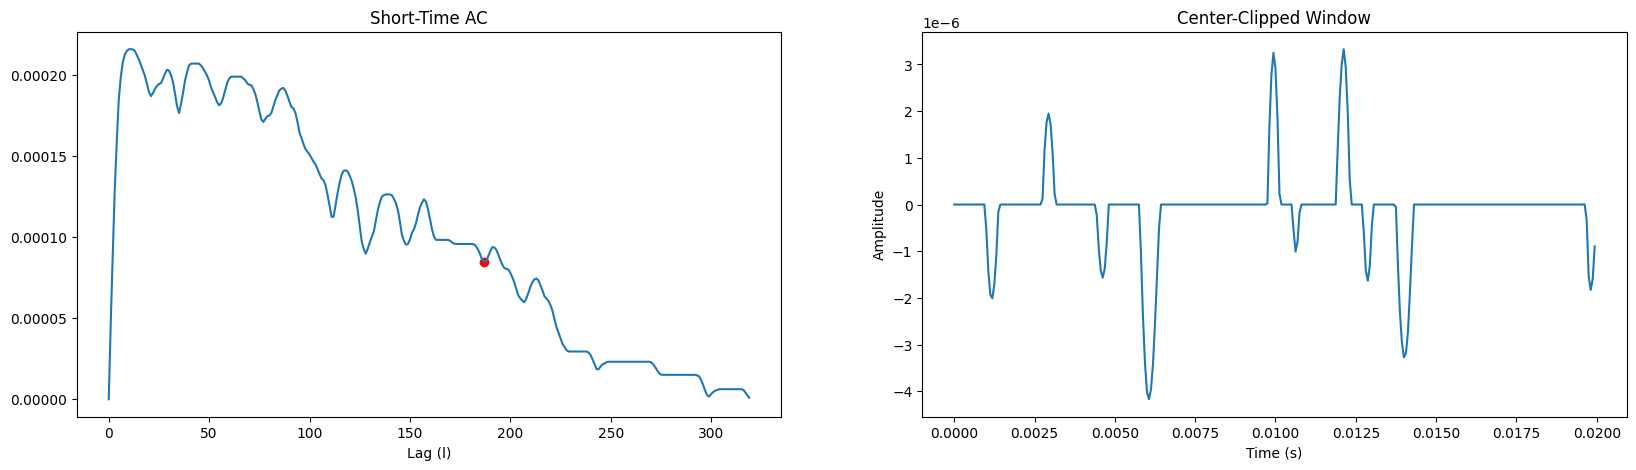

Local Maxima Indices: [ 61  96 107 142 192]
Maximum Lag :  147


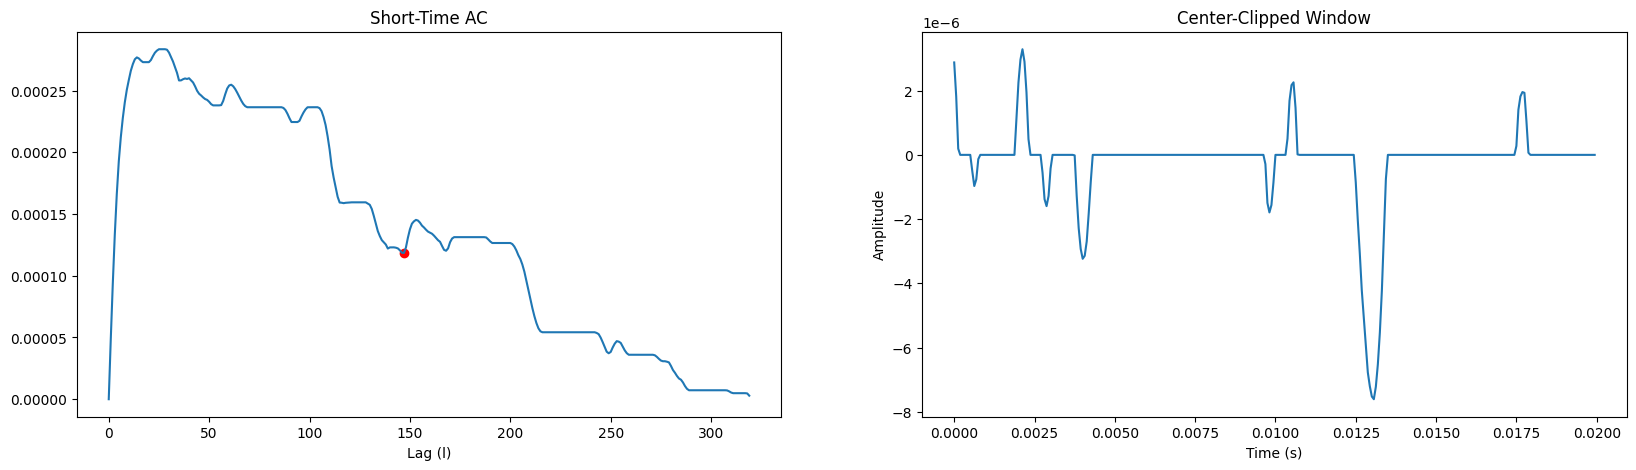

Local Maxima Indices: [ 61  96 107 142 192]
Maximum Lag :  188


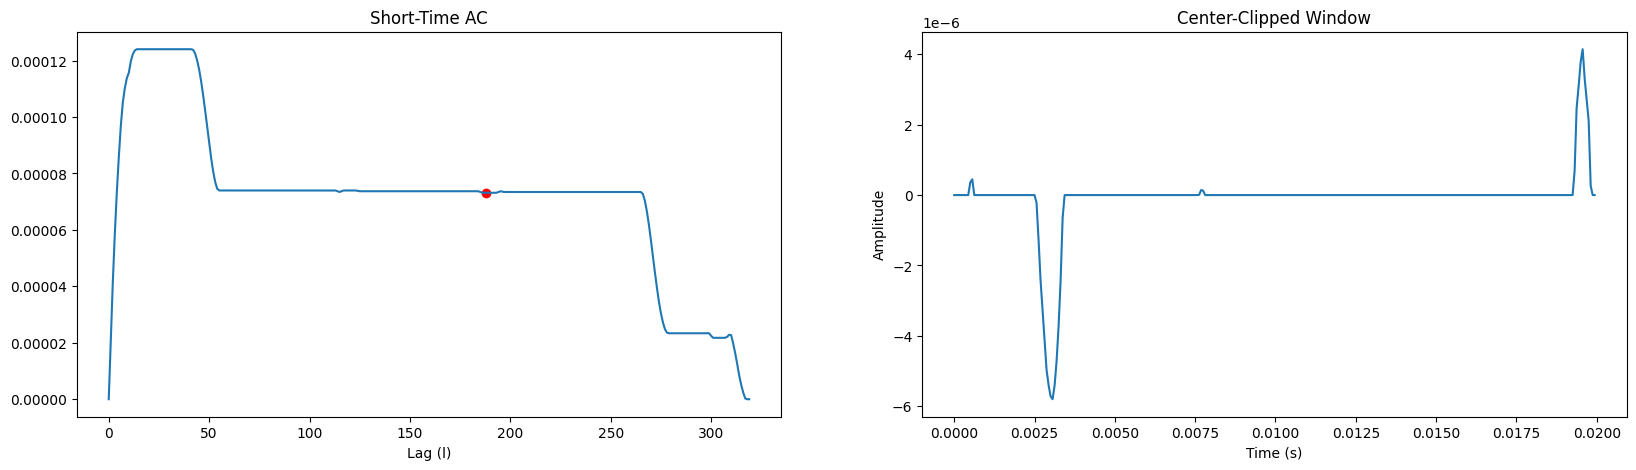

Local Maxima Indices: [ 61  96 107 142 192]
Maximum Lag :  174


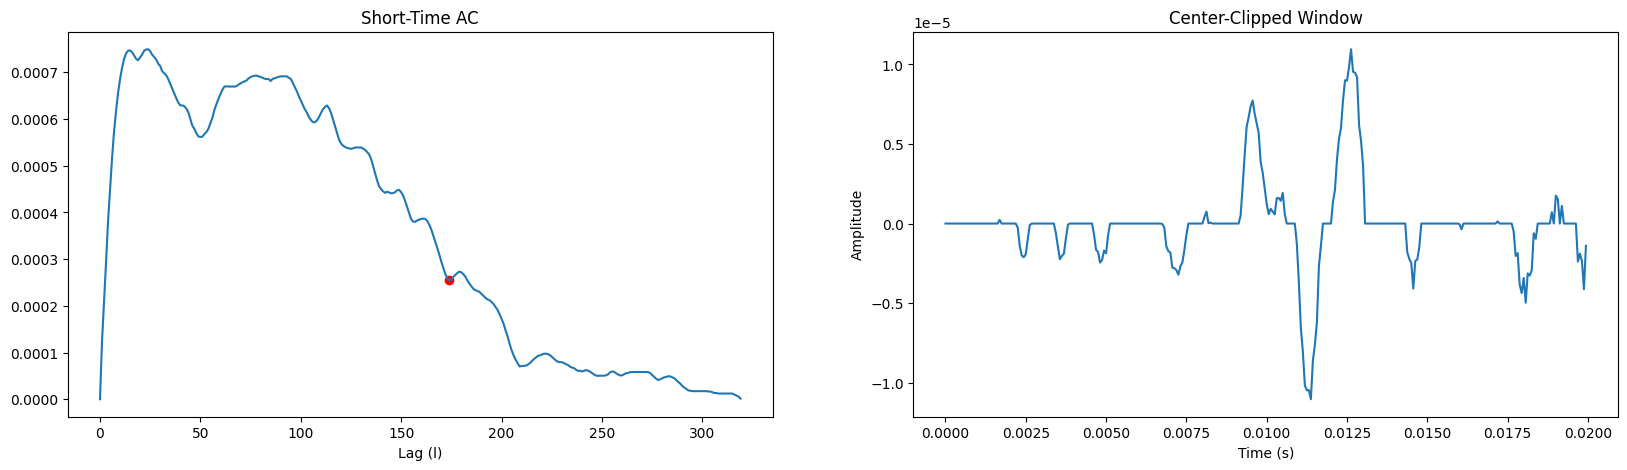

Local Maxima Indices: [ 61  96 107 142 192]
Maximum Lag :  141


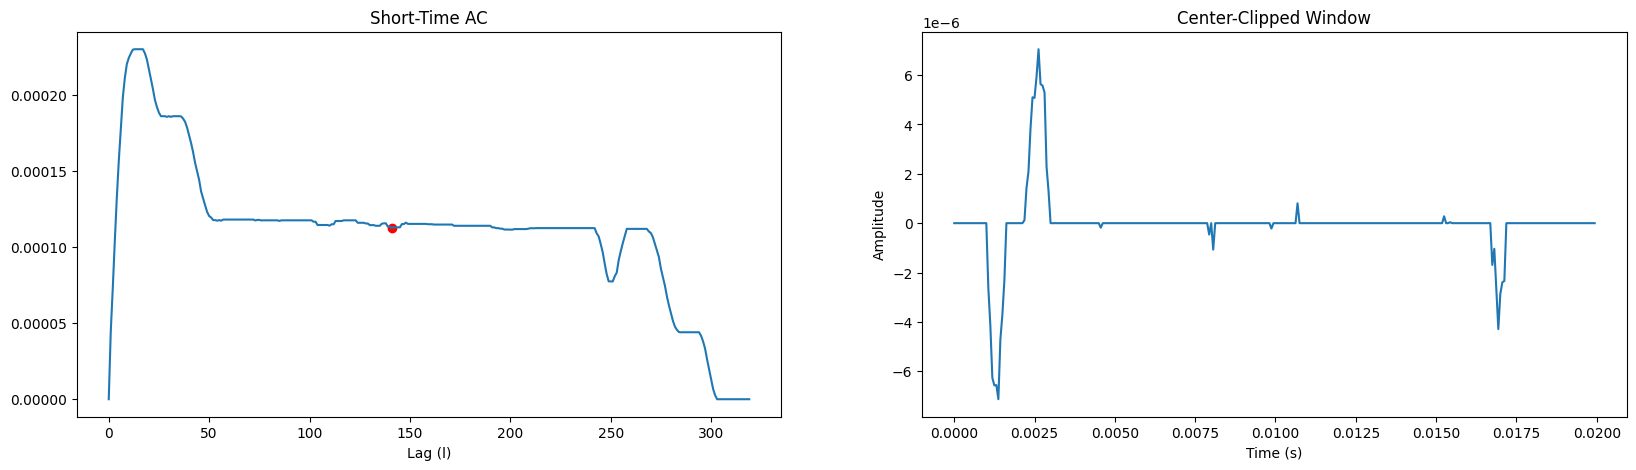

Local Maxima Indices: [ 61  96 107 142 192]
Maximum Lag :  122


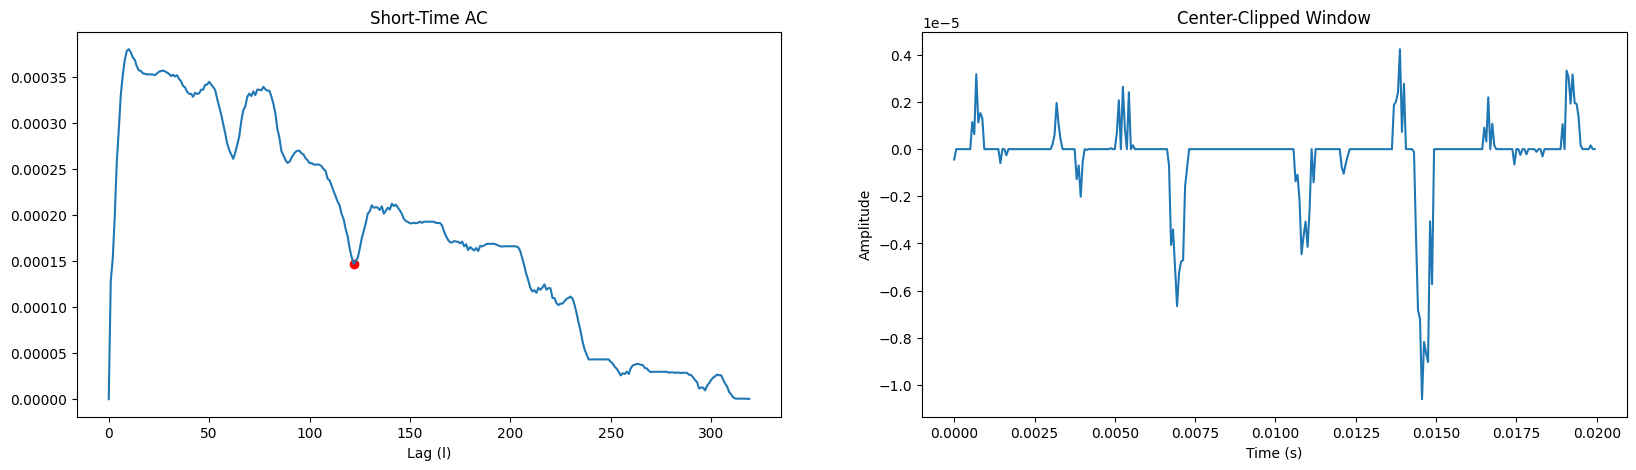

Local Maxima Indices: [ 61  96 107 142 192]
Maximum Lag :  196


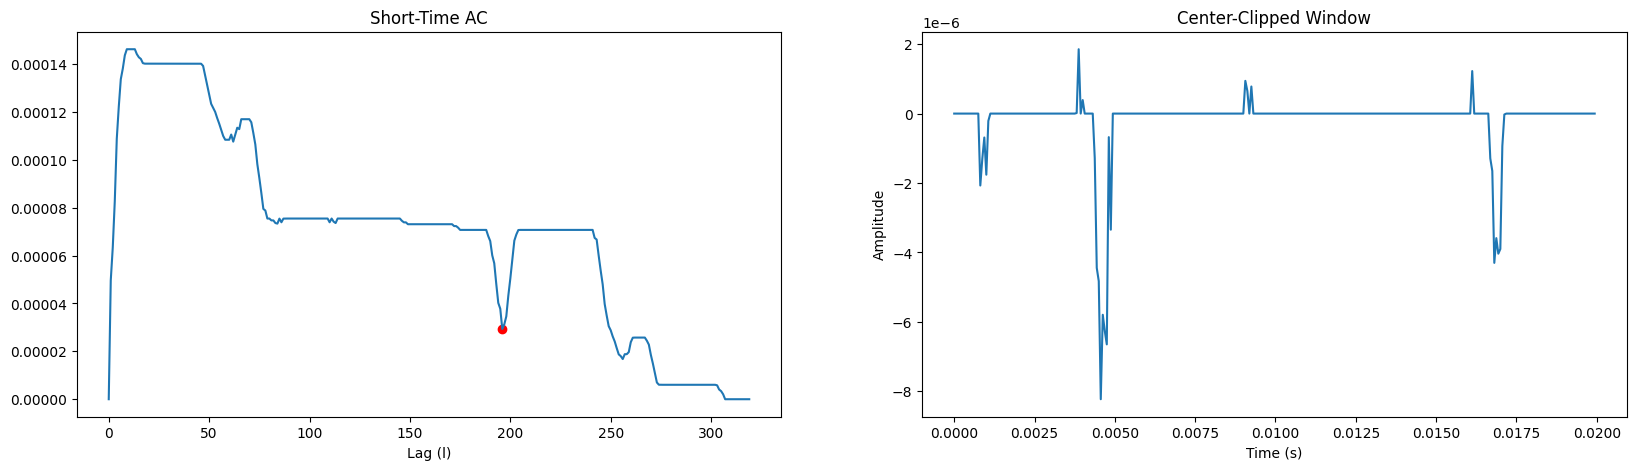

Local Maxima Indices: [ 61  96 107 142 192]
Maximum Lag :  189


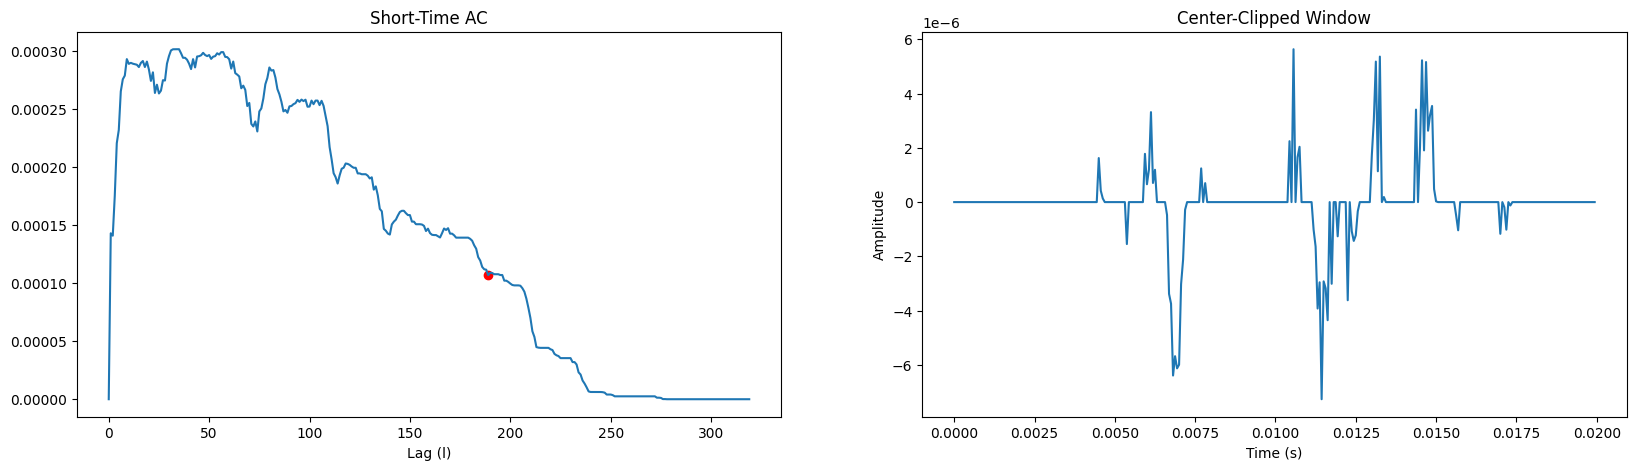

In [43]:
## Window at Frame 1
## First Window

# window center : n
n = win_len
x = yr_lpf
w = np.zeros_like(x)    

pitch_period_tuple = []

cnt = 1
for n in range(win_len,len(x)+1,hop_len):
    ## In the Window
    
    ## Computation of CL

    # 320 길이를 갖는 region 생성
    # n-win_len+1 ~ n
    # n-319 ~ n
    x_n = x[n-win_len+1:n+1]
    
    Clipper = ThresholdClipper(x_n)
    CL = Clipper.calculate_thres()
    yr_center = Clipper.center_clip(CL)

    # x_n 을 shifting 하며 AC 계산하기
    x_n = yr_center

    #### AMDF
    amdf_arr = np.array(AMDF(x_n))
    
    # local maxima 찾기
    minima_indices, _ = find_peaks(-amdf_arr)
    minima_indices = minima_indices[(minima_indices>50) & (minima_indices<200)]
    
    # 결과 출력

    # 그래프로 표시
    if minima_indices.size > 0:
        maxval = np.max([-amdf_arr[i] for i in minima_indices])
        idx = np.argmax([-amdf_arr[i] for i in minima_indices])
        max_idx = minima_indices[idx]
        
    else:
        maxval = 0

    pitch_period_tuple.append((n,max_idx))

    flag = 1
    
    # cnt +=1
    # if cnt < 5:
    #     plt.figure()
    #     plt.plot(amdf_arr, label='Autocorrelation Sequence')
    #     # print("Local Maxima Indices:", minima_indices)
    #     if flag:
    #         print("Maximum Lag : ",max_idx)
    #         plt.scatter(max_idx, amdf_arr[max_idx], color='red', label='Local Maxima')
    #     plt.show()
    plotnum=10
    if cnt < plotnum:
        plt.figure(figsize=(20,5))
        plt.subplot(1,2,1)
        plt.title("Short-Time AC")
        plt.plot(amdf_arr, label='Autocorrelation Sequence')
        plt.xlabel("Lag (l)")
        print("Local Maxima Indices:", maxima_indices)

        if flag:
            print("Maximum Lag : ",max_idx)
            plt.scatter(max_idx, amdf_arr[max_idx], color='red', label='Local Maxima')
        plt.subplot(1,2,2)
        plt.title("Center-Clipped Window")
        t1 = np.linspace(0,len(x_n),len(x_n),endpoint=False)/sr
        plt.plot(t1,x_n)
        # plt.ylim(bottom=-0.1, top=0.1)
        plt.ylabel("Amplitude")
        plt.xlabel("Time (s)")
        plt.show()
        cnt +=1

## Pitch Contour

8480
8500
(148, 187, 147, 188, 174, 141, 122, 196, 189, 187, 190, 150, 177, 158, 180, 181, 62, 190, 196, 99, 121, 119, 131, 133, 132, 131, 135, 135, 137, 137, 138, 139, 140, 141, 139, 139, 138, 138, 138, 138, 139, 138, 137, 140, 138, 124, 140, 137, 136, 141, 139, 140)


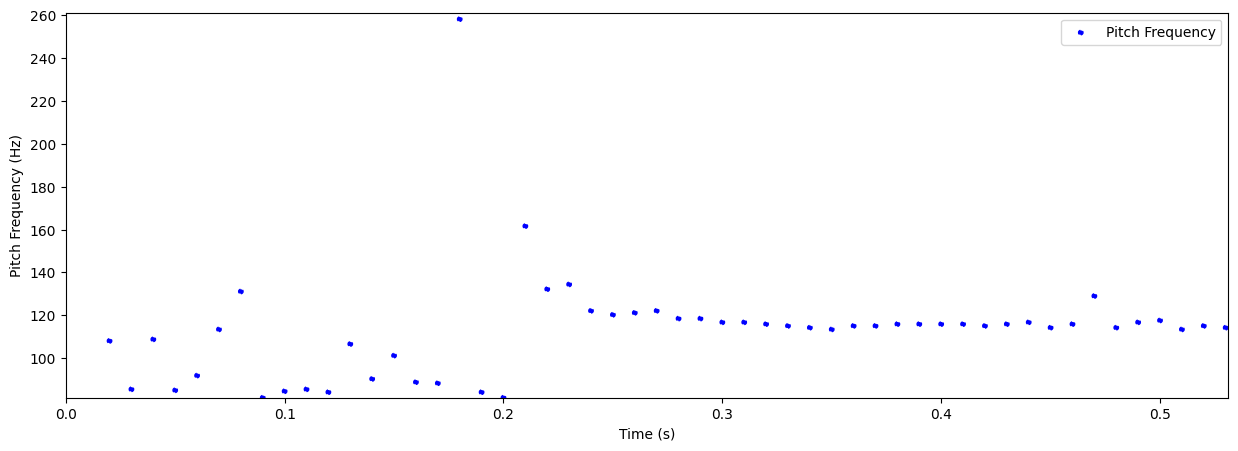

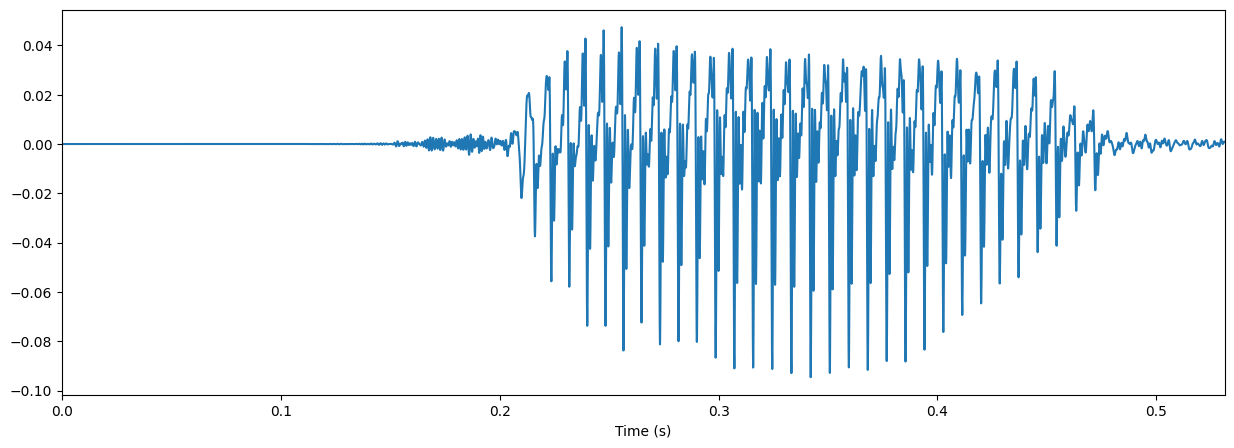

114.28571428571429


In [44]:
## Pitch Contour Plot
n_values, max_idx_values = zip(*pitch_period_tuple)
print(n_values[-1])
print(len(time))
n_values = np.array(n_values) / sr

print(max_idx_values)

plt.figure(figsize=(15,5))
pitch_frequencies = sr / np.array(max_idx_values)
plt.scatter(n_values, pitch_frequencies, label='Pitch Frequency', linestyle='dashed', color='blue',s=10)
plt.xlim(left=time[0], right=time[-1])

plt.xlabel('Time (s)')
plt.ylabel('Pitch Frequency (Hz)')
plt.ylim(bottom=np.min(pitch_frequencies),top=np.max(pitch_frequencies)+3)
plt.legend()

plt.figure(figsize=(15,5))
plt.plot(time, yr_lpf)
plt.xlim(left=time[0], right=time[-1])
plt.xlabel('Time (s)')
plt.show()

print(pitch_frequencies[-1])

## Median Filtering

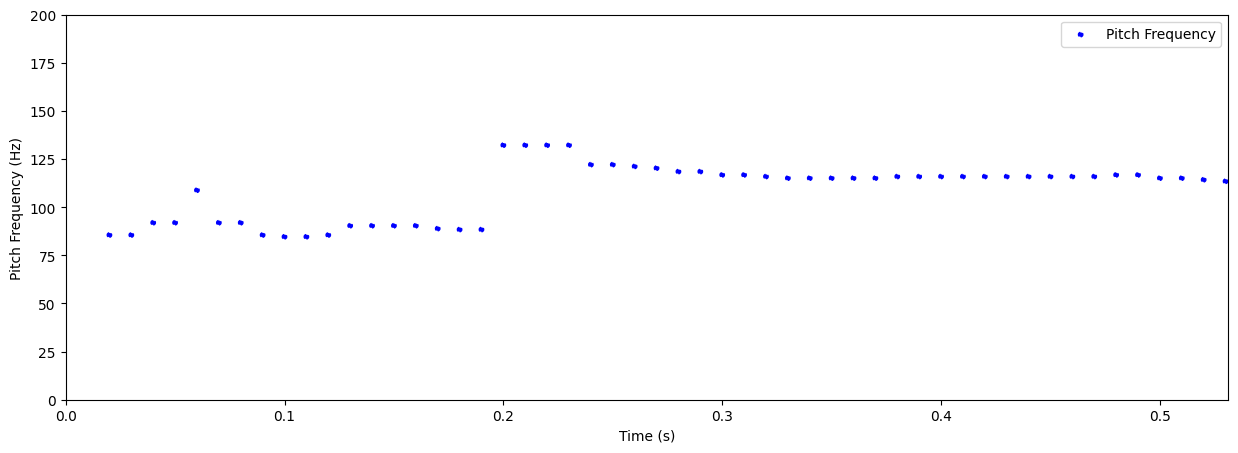

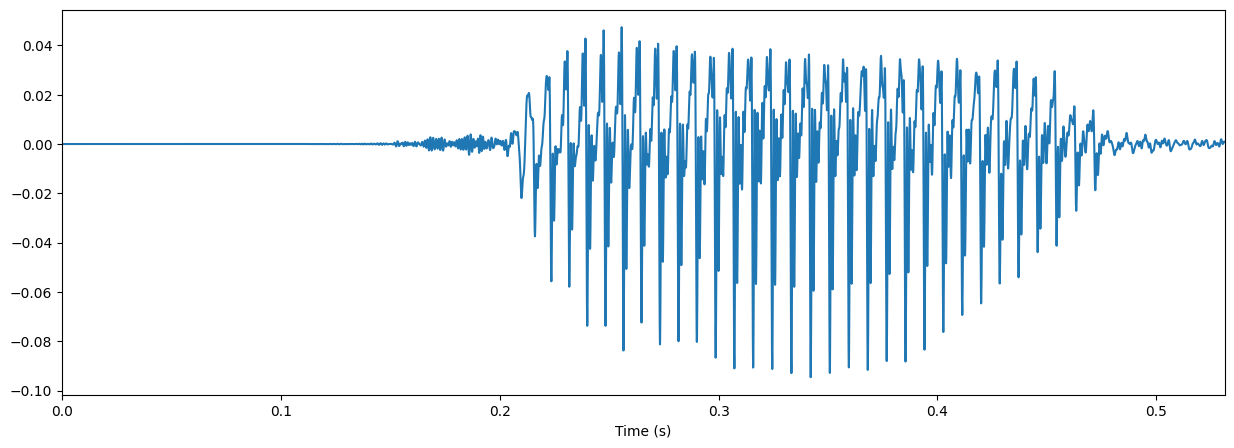

113.47517730496453


In [45]:
from scipy.signal import medfilt
pitch_freq_filterd = medfilt(pitch_frequencies, kernel_size=5)

plt.figure(figsize=(15,5))
# plt.scatter(n_values, pitch_frequencies, label='Pitch Frequency', linestyle='dashed', color='red',s=3)
plt.scatter(n_values, pitch_freq_filterd, label='Pitch Frequency', linestyle='dashed', color='blue',s=10)

# plt.xlim(left=n_values[0], right=n_values[-1])

plt.xlabel('Time (s)')
plt.ylabel('Pitch Frequency (Hz)')
plt.xlim(left=time[0], right=time[-1])
# plt.ylim(bottom=np.min(pitch_frequencies),top=np.max(pitch_frequencies)+3)
plt.ylim(bottom=0,top=200)

# plt.ylim(bottom=120, top=150)
plt.legend()

plt.figure(figsize=(15,5))
plt.plot(time, yr_lpf)
plt.xlabel('Time (s)')

# plt.xlim(left=n_values[0], right=n_values[-1])
plt.xlim(left=time[0], right=time[-1])

plt.show()

print(pitch_freq_filterd[-1])

